In [1]:
!pip install tensorflow
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import time

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

Defaulting to user installation because normal site-packages is not writeable



In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow import keras

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Print the shapes of the loaded data
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (50000, 32, 32, 3), y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3), y_test shape: (10000, 1)


In [3]:
import tensorflow as tf

class SimpleMLP:
    @staticmethod
    def build():
        # Load the pre-trained VGG19 model
        base_model = tf.keras.applications.VGG19(
            include_top=False, weights='imagenet', input_shape=(32, 32, 3)
        )
        
        # Freeze all layers except the last two convolutional layers and the classification layer
        for layer in base_model.layers[:-5]:
            layer.trainable = False
        
        # Create custom classification layers on top of the base model
        model = tf.keras.models.Sequential([
            base_model,
            tf.keras.layers.GlobalAveragePooling2D(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')  # Adjust the number of output classes accordingly
        ])
        
        # Create an optimizer with the specified learning rate
        custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
        
        # Compile the model with the custom optimizer
        model.compile(
            optimizer=custom_optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        return model

# Create an instance of the SimpleMLP class
simple_mlp_model = SimpleMLP.build()

# Display the model summary
simple_mlp_model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 20292170 (77.41 MB)
Trainable params: 9707018 (37.03 MB)
Non-trainable params: 10585152 (40.38 MB)
_________________________________________________________________


In [4]:
type(x_train)

numpy.ndarray

In [5]:
!pip install numpy

import numpy as np
x_train_array = np.array(x_train)


Defaulting to user installation because normal site-packages is not writeable


In [7]:
type(y_test)
type(x_test)
type(y_train)

numpy.ndarray

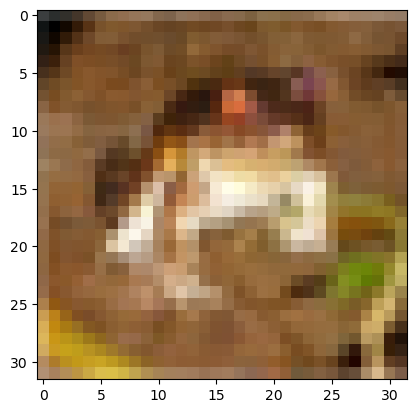

In [8]:

import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [9]:
train1=x_train[0:9000]
label1=y_train[0:9000]
train2=x_train[9000:22000]
label2=y_train[9000:22000]
train3=x_train[22000:38000]
label3=y_train[22000:38000]
train4=x_train[38000:50000]
label4=y_train[38000:50000]

In [10]:
from keras.utils import to_categorical
import numpy as np

#convert labels to one-hot encoding
label1 = to_categorical(label1)
label2 = to_categorical(label2)

label3 = to_categorical(label3)
label4 = to_categorical(label4)
y_test=to_categorical(y_test)

In [11]:
# def create_clients(data_list, label_list, num_clients=4, initial='clients'):
#     ''' return: a dictionary with keys clients' names and value as
#                 data shards - tuple of datas and label lists.
#         args:
#             data_list: a list of numpy arrays of training data
#             label_list:a list of binarized labels for each data
#             num_client: number of fedrated members (clients)
#             initials: the clients'name prefix, e.g, clients_1

#     '''

#     #create a list of client names
#     client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]

#     #randomize the data
#     data = list(zip(data_list, label_list))
#     random.shuffle(data)

#     #shard data and place at each client
#     size = len(data)//num_clients
#     shards = [data[i:i + size] for i in range(0, size*num_clients, size)]

#     #number of clients must equal number of shards
#     assert(len(shards) == len(client_names))

#     return {client_names[i] : shards[i] for i in range(len(client_names))}

def create_clients(data_dict):
    '''
    Return a dictionary with keys as client names and values as data and label lists.

    Args:
        data_dict: A dictionary where keys are client names, and values are tuples of data and labels.
                    For example, {'client_1': (data_1, labels_1), 'client_2': (data_2, labels_2), ...}

    Returns:
        A dictionary with keys as client names and values as tuples of data and label lists.
    '''
    return data_dict

#import tensorflow as tf
#x1= (ds_train.iloc[0:15000,1:]) # data for client 1
#y1 = (ds_train.iloc[0:15000,0])  # labels for client 1
#print(y1)
#y1 = tf.one_hot(y1, depth=3) # Convert to one-hot encoding using tf.one_hot
#print(y1)

#x2 = (ds_train.iloc[15000:30000,1:]) # data for client 2
#y2 = (ds_train.iloc[15000:30000,0])  # labels for client 2
#print(y2)
#y2 = tf.one_hot(y2, depth=2)
#print(y2)

#x3= (ds_train.iloc[30000:45000,1:]) # data for client 3
#y3= (ds_train.iloc[30000:45000,0])  # labels for client 3
#print(y3)
#y3 = tf.one_hot(y3, depth=2)
#print(y3)

#x4 = (ds_train.iloc[45000:60000,1:]) # data for client 4
#y4 = (ds_train.iloc[45000:60000,0])  # labels for client 4
#print(y4)
#y4= tf.one_hot(y4, depth=3)
#print(y4)

def test_model(x_test, y_test,  model, comm_round):
    loss,accuracy=model.evaluate(x_test,y_test)
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, accuracy, loss))
    return accuracy, loss


def avg_weights(scaled_weight_list):
    '''Return the average of the listed scaled weights.'''
    num_clients = len(scaled_weight_list)

    if num_clients == 0:
        return None  # Handle the case where the list is empty

    avg_grad = list()

    # Get the sum of gradients across all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0) / num_clients
        avg_grad.append(layer_mean)

    return avg_grad



client_data = {
    'client_1': (train1,label1),
    'client_2': (train2,label2),
    'client_3': (train3,label3),
    'client_4': (train4,label4),


}


#create clients
clients_batched = create_clients(client_data)





In [12]:
client_names = list(clients_batched.keys())

In [13]:
# Number of global epochs
comms_round = 40
acc3 = []

# Create an instance of the SimpleMLP class
simple_mlp_model = SimpleMLP.build()

# Define global_model before the loop
global_model = simple_mlp_model

for comm_round in range(comms_round):
    # Get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()

    # Initial list to collect local model weights after scaling
    local_weight_list = []

    # Randomize client data - using keys
    client_names = list(clients_batched.keys())
    # random.shuffle(client_names)

    for client in tqdm(client_names, desc='Progress Bar'):
        local_model = simple_mlp_model
        local_model.compile(
            loss='categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(),  # Using recommended optimizer creation method
            metrics=['accuracy']
        )

        # Set local model weight to the weight of the global model
        local_model.set_weights(global_weights)

        # Fit local model with client's data
        local_model.fit(
            np.array(clients_batched[client][0]),
            np.array(clients_batched[client][1]),
            epochs=2,
            batch_size=32,
            verbose=2
        )

        # Get the scaled model weights and add to the list
        weights = local_model.get_weights()
        local_weight_list.append(weights)

        # Clear the session to free memory after each communication round
        K.clear_session()

    # Calculate the average weights across all clients for each layer
    average_weights = avg_weights(local_weight_list)

    # Update the global model with the average weights
    global_model.set_weights(average_weights)

    # Test the global model and print out metrics after each communications round
    global_acc, global_loss = test_model(x_test, y_test, global_model, comm_round)
    acc3.append(global_acc)


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2


282/282 - 110s - loss: 2.3073 - accuracy: 0.0959 - 110s/epoch - 391ms/step
Epoch 2/2
282/282 - 104s - loss: 2.3027 - accuracy: 0.0943 - 104s/epoch - 370ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:34<10:44, 215.00s/it]

Epoch 1/2
407/407 - 151s - loss: 1.5731 - accuracy: 0.4225 - 151s/epoch - 371ms/step
Epoch 2/2
407/407 - 150s - loss: 1.1433 - accuracy: 0.5989 - 150s/epoch - 369ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [08:36<08:51, 265.86s/it]

Epoch 1/2
500/500 - 174s - loss: 1.4950 - accuracy: 0.4523 - 174s/epoch - 348ms/step
Epoch 2/2
500/500 - 175s - loss: 1.0725 - accuracy: 0.6299 - 175s/epoch - 350ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [14:25<05:04, 304.00s/it]

Epoch 1/2
375/375 - 132s - loss: 1.6328 - accuracy: 0.4053 - 132s/epoch - 351ms/step
Epoch 2/2
375/375 - 130s - loss: 1.1331 - accuracy: 0.6101 - 130s/epoch - 346ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [18:47<00:00, 281.97s/it]


313/313 [==============================] - 21s 67ms/step - loss: 2.6538 - accuracy: 0.1000
comm_round: 0 | global_acc: 10.000% | global_loss: 2.6538209915161133


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 98s - loss: 1.2893 - accuracy: 0.5616 - 98s/epoch - 348ms/step
Epoch 2/2
282/282 - 100s - loss: 1.0541 - accuracy: 0.6502 - 100s/epoch - 353ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:17<09:53, 197.99s/it]

Epoch 1/2
407/407 - 142s - loss: 1.2775 - accuracy: 0.5545 - 142s/epoch - 348ms/step
Epoch 2/2
407/407 - 140s - loss: 1.0276 - accuracy: 0.6621 - 140s/epoch - 345ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [08:00<08:15, 247.69s/it]

Epoch 1/2
500/500 - 174s - loss: 1.2292 - accuracy: 0.5794 - 174s/epoch - 347ms/step
Epoch 2/2
500/500 - 191s - loss: 1.0121 - accuracy: 0.6636 - 191s/epoch - 382ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [14:05<05:01, 301.21s/it]

Epoch 1/2
375/375 - 146s - loss: 1.2614 - accuracy: 0.5656 - 146s/epoch - 390ms/step
Epoch 2/2
375/375 - 147s - loss: 1.0197 - accuracy: 0.6587 - 147s/epoch - 391ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [18:58<00:00, 284.71s/it]


313/313 [==============================] - 30s 94ms/step - loss: 1.4475 - accuracy: 0.5094
comm_round: 1 | global_acc: 50.940% | global_loss: 1.4474565982818604


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 111s - loss: 1.0716 - accuracy: 0.6472 - 111s/epoch - 393ms/step
Epoch 2/2
282/282 - 108s - loss: 0.9238 - accuracy: 0.6910 - 108s/epoch - 385ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:39<10:59, 219.78s/it]

Epoch 1/2
407/407 - 165s - loss: 1.0586 - accuracy: 0.6499 - 165s/epoch - 405ms/step
Epoch 2/2
407/407 - 161s - loss: 0.9368 - accuracy: 0.6819 - 161s/epoch - 395ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [09:05<09:24, 282.27s/it]

Epoch 1/2
500/500 - 203s - loss: 1.0449 - accuracy: 0.6506 - 203s/epoch - 405ms/step
Epoch 2/2
500/500 - 202s - loss: 0.9173 - accuracy: 0.6916 - 202s/epoch - 405ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [15:51<05:38, 338.58s/it]

Epoch 1/2
375/375 - 150s - loss: 1.0531 - accuracy: 0.6448 - 150s/epoch - 401ms/step
Epoch 2/2
375/375 - 148s - loss: 0.9235 - accuracy: 0.6930 - 148s/epoch - 396ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [20:50<00:00, 312.69s/it]


313/313 [==============================] - 32s 100ms/step - loss: 0.9574 - accuracy: 0.6944
comm_round: 2 | global_acc: 69.440% | global_loss: 0.9573936462402344


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 114s - loss: 0.9377 - accuracy: 0.6877 - 114s/epoch - 404ms/step
Epoch 2/2
282/282 - 110s - loss: 0.8323 - accuracy: 0.7178 - 110s/epoch - 391ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:44<11:13, 224.51s/it]

Epoch 1/2
407/407 - 169s - loss: 0.9497 - accuracy: 0.6844 - 169s/epoch - 416ms/step
Epoch 2/2
407/407 - 161s - loss: 0.8571 - accuracy: 0.7122 - 161s/epoch - 395ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [09:15<09:33, 286.88s/it]

Epoch 1/2
500/500 - 201s - loss: 0.9470 - accuracy: 0.6811 - 201s/epoch - 403ms/step
Epoch 2/2
500/500 - 198s - loss: 0.8480 - accuracy: 0.7139 - 198s/epoch - 397ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [15:55<05:38, 338.73s/it]

Epoch 1/2
375/375 - 146s - loss: 0.9256 - accuracy: 0.6913 - 146s/epoch - 389ms/step
Epoch 2/2
375/375 - 144s - loss: 0.8525 - accuracy: 0.7143 - 144s/epoch - 384ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [20:45<00:00, 311.50s/it]


313/313 [==============================] - 30s 94ms/step - loss: 0.9010 - accuracy: 0.7058
comm_round: 3 | global_acc: 70.580% | global_loss: 0.9010289907455444


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 113s - loss: 0.8531 - accuracy: 0.7181 - 113s/epoch - 401ms/step
Epoch 2/2
282/282 - 112s - loss: 0.7911 - accuracy: 0.7374 - 112s/epoch - 398ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:45<11:17, 225.71s/it]

Epoch 1/2
407/407 - 160s - loss: 0.8822 - accuracy: 0.7017 - 160s/epoch - 394ms/step
Epoch 2/2
407/407 - 157s - loss: 0.8282 - accuracy: 0.7237 - 157s/epoch - 387ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [09:03<09:20, 280.13s/it]

Epoch 1/2
500/500 - 202s - loss: 0.8769 - accuracy: 0.7045 - 202s/epoch - 404ms/step
Epoch 2/2
500/500 - 194s - loss: 0.7996 - accuracy: 0.7276 - 194s/epoch - 389ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [15:41<05:33, 333.64s/it]

Epoch 1/2
375/375 - 133s - loss: 0.8817 - accuracy: 0.7006 - 133s/epoch - 354ms/step
Epoch 2/2
375/375 - 132s - loss: 0.7941 - accuracy: 0.7343 - 132s/epoch - 353ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [20:06<00:00, 301.60s/it]


313/313 [==============================] - 21s 68ms/step - loss: 0.8452 - accuracy: 0.7235
comm_round: 4 | global_acc: 72.350% | global_loss: 0.8452463746070862


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 104s - loss: 0.8227 - accuracy: 0.7294 - 104s/epoch - 367ms/step
Epoch 2/2
282/282 - 99s - loss: 0.7443 - accuracy: 0.7442 - 99s/epoch - 353ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:23<10:09, 203.20s/it]

Epoch 1/2
407/407 - 147s - loss: 0.8479 - accuracy: 0.7168 - 147s/epoch - 360ms/step
Epoch 2/2
407/407 - 149s - loss: 0.7778 - accuracy: 0.7372 - 149s/epoch - 367ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [08:19<08:35, 257.82s/it]

Epoch 1/2
500/500 - 184s - loss: 0.8334 - accuracy: 0.7148 - 184s/epoch - 368ms/step
Epoch 2/2
500/500 - 178s - loss: 0.7790 - accuracy: 0.7343 - 178s/epoch - 355ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [14:21<05:05, 305.30s/it]

Epoch 1/2
375/375 - 155s - loss: 0.8261 - accuracy: 0.7218 - 155s/epoch - 415ms/step
Epoch 2/2
375/375 - 151s - loss: 0.7551 - accuracy: 0.7455 - 151s/epoch - 402ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [19:27<00:00, 291.93s/it]


313/313 [==============================] - 31s 97ms/step - loss: 0.8413 - accuracy: 0.7295
comm_round: 5 | global_acc: 72.950% | global_loss: 0.8412550091743469


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 113s - loss: 0.7773 - accuracy: 0.7443 - 113s/epoch - 401ms/step
Epoch 2/2
282/282 - 111s - loss: 0.7091 - accuracy: 0.7620 - 111s/epoch - 395ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:45<11:15, 225.05s/it]

Epoch 1/2
407/407 - 163s - loss: 0.7979 - accuracy: 0.7352 - 163s/epoch - 401ms/step
Epoch 2/2
407/407 - 160s - loss: 0.7601 - accuracy: 0.7455 - 160s/epoch - 392ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [09:08<09:25, 282.86s/it]

Epoch 1/2
500/500 - 209s - loss: 0.8013 - accuracy: 0.7291 - 209s/epoch - 419ms/step
Epoch 2/2
500/500 - 205s - loss: 0.7623 - accuracy: 0.7397 - 205s/epoch - 410ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [16:03<05:43, 343.27s/it]

Epoch 1/2
375/375 - 150s - loss: 0.7859 - accuracy: 0.7355 - 150s/epoch - 399ms/step
Epoch 2/2
375/375 - 148s - loss: 0.7225 - accuracy: 0.7560 - 148s/epoch - 394ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [21:01<00:00, 315.33s/it]


313/313 [==============================] - 30s 95ms/step - loss: 0.8114 - accuracy: 0.7328
comm_round: 6 | global_acc: 73.280% | global_loss: 0.8114076852798462


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 114s - loss: 0.7593 - accuracy: 0.7481 - 114s/epoch - 403ms/step
Epoch 2/2
282/282 - 113s - loss: 0.6840 - accuracy: 0.7664 - 113s/epoch - 402ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:47<11:22, 227.51s/it]

Epoch 1/2
407/407 - 159s - loss: 0.7890 - accuracy: 0.7353 - 159s/epoch - 390ms/step
Epoch 2/2
407/407 - 159s - loss: 0.7138 - accuracy: 0.7643 - 159s/epoch - 391ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [09:06<09:22, 281.06s/it]

Epoch 1/2
500/500 - 200s - loss: 0.7853 - accuracy: 0.7384 - 200s/epoch - 400ms/step
Epoch 2/2
500/500 - 180s - loss: 0.7112 - accuracy: 0.7581 - 180s/epoch - 360ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [15:26<05:26, 326.43s/it]

Epoch 1/2
375/375 - 136s - loss: 0.7662 - accuracy: 0.7450 - 136s/epoch - 362ms/step
Epoch 2/2
375/375 - 137s - loss: 0.6940 - accuracy: 0.7660 - 137s/epoch - 365ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [19:59<00:00, 299.82s/it]


313/313 [==============================] - 21s 67ms/step - loss: 0.8218 - accuracy: 0.7307
comm_round: 7 | global_acc: 73.070% | global_loss: 0.8218331336975098


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 105s - loss: 0.7245 - accuracy: 0.7519 - 105s/epoch - 372ms/step
Epoch 2/2
282/282 - 106s - loss: 0.6562 - accuracy: 0.7743 - 106s/epoch - 374ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:30<10:31, 210.64s/it]

Epoch 1/2
407/407 - 146s - loss: 0.7666 - accuracy: 0.7446 - 146s/epoch - 360ms/step
Epoch 2/2
407/407 - 157s - loss: 0.6999 - accuracy: 0.7629 - 157s/epoch - 385ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [08:33<08:50, 265.15s/it]

Epoch 1/2
500/500 - 199s - loss: 0.7553 - accuracy: 0.7457 - 199s/epoch - 399ms/step
Epoch 2/2
500/500 - 198s - loss: 0.7001 - accuracy: 0.7616 - 198s/epoch - 396ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [15:12<05:25, 325.87s/it]

Epoch 1/2
375/375 - 150s - loss: 0.7467 - accuracy: 0.7474 - 150s/epoch - 400ms/step
Epoch 2/2
375/375 - 149s - loss: 0.6572 - accuracy: 0.7745 - 149s/epoch - 397ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [20:11<00:00, 302.90s/it]


313/313 [==============================] - 30s 94ms/step - loss: 0.7831 - accuracy: 0.7395
comm_round: 8 | global_acc: 73.950% | global_loss: 0.7830570340156555


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 114s - loss: 0.7167 - accuracy: 0.7614 - 114s/epoch - 403ms/step
Epoch 2/2
282/282 - 111s - loss: 0.6364 - accuracy: 0.7808 - 111s/epoch - 393ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:44<11:14, 224.90s/it]

Epoch 1/2
407/407 - 164s - loss: 0.7497 - accuracy: 0.7539 - 164s/epoch - 402ms/step
Epoch 2/2
407/407 - 160s - loss: 0.6779 - accuracy: 0.7708 - 160s/epoch - 392ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [09:08<09:26, 283.09s/it]

Epoch 1/2
500/500 - 199s - loss: 0.7437 - accuracy: 0.7483 - 199s/epoch - 399ms/step
Epoch 2/2
500/500 - 198s - loss: 0.6846 - accuracy: 0.7689 - 198s/epoch - 395ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [15:46<05:35, 335.39s/it]

Epoch 1/2
375/375 - 150s - loss: 0.7192 - accuracy: 0.7571 - 150s/epoch - 399ms/step
Epoch 2/2
375/375 - 148s - loss: 0.6812 - accuracy: 0.7730 - 148s/epoch - 393ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [20:44<00:00, 311.00s/it]


313/313 [==============================] - 30s 95ms/step - loss: 0.7782 - accuracy: 0.7426
comm_round: 9 | global_acc: 74.260% | global_loss: 0.7781520485877991


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 113s - loss: 0.7003 - accuracy: 0.7617 - 113s/epoch - 399ms/step
Epoch 2/2
282/282 - 109s - loss: 0.6340 - accuracy: 0.7840 - 109s/epoch - 386ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:41<11:05, 221.95s/it]

Epoch 1/2
407/407 - 161s - loss: 0.7221 - accuracy: 0.7543 - 161s/epoch - 396ms/step
Epoch 2/2
407/407 - 152s - loss: 0.6562 - accuracy: 0.7775 - 152s/epoch - 374ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [08:56<09:12, 276.15s/it]

Epoch 1/2
500/500 - 182s - loss: 0.7090 - accuracy: 0.7628 - 182s/epoch - 365ms/step
Epoch 2/2
500/500 - 183s - loss: 0.6670 - accuracy: 0.7726 - 183s/epoch - 366ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [15:01<05:17, 317.13s/it]

Epoch 1/2
375/375 - 139s - loss: 0.7110 - accuracy: 0.7630 - 139s/epoch - 370ms/step
Epoch 2/2
375/375 - 140s - loss: 0.6899 - accuracy: 0.7681 - 140s/epoch - 372ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [19:40<00:00, 295.16s/it]


313/313 [==============================] - 24s 75ms/step - loss: 0.7732 - accuracy: 0.7404
comm_round: 10 | global_acc: 74.040% | global_loss: 0.7732464075088501


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 99s - loss: 0.6970 - accuracy: 0.7658 - 99s/epoch - 351ms/step
Epoch 2/2
282/282 - 99s - loss: 0.6012 - accuracy: 0.7977 - 99s/epoch - 352ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:18<09:55, 198.57s/it]

Epoch 1/2
407/407 - 143s - loss: 0.7203 - accuracy: 0.7596 - 143s/epoch - 352ms/step
Epoch 2/2
407/407 - 144s - loss: 0.6418 - accuracy: 0.7856 - 144s/epoch - 353ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [08:05<08:21, 250.78s/it]

Epoch 1/2
500/500 - 180s - loss: 0.6972 - accuracy: 0.7666 - 180s/epoch - 359ms/step
Epoch 2/2
500/500 - 178s - loss: 0.6483 - accuracy: 0.7790 - 178s/epoch - 355ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [14:03<04:59, 299.49s/it]

Epoch 1/2
375/375 - 136s - loss: 0.6956 - accuracy: 0.7688 - 136s/epoch - 362ms/step
Epoch 2/2
375/375 - 133s - loss: 0.6402 - accuracy: 0.7837 - 133s/epoch - 354ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [18:32<00:00, 278.07s/it]


313/313 [==============================] - 19s 62ms/step - loss: 0.7881 - accuracy: 0.7376
comm_round: 11 | global_acc: 73.760% | global_loss: 0.788122296333313


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 100s - loss: 0.6673 - accuracy: 0.7722 - 100s/epoch - 354ms/step
Epoch 2/2
282/282 - 99s - loss: 0.5935 - accuracy: 0.7996 - 99s/epoch - 350ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:18<09:56, 198.94s/it]

Epoch 1/2
407/407 - 144s - loss: 0.6919 - accuracy: 0.7669 - 144s/epoch - 354ms/step
Epoch 2/2
407/407 - 143s - loss: 0.6584 - accuracy: 0.7777 - 143s/epoch - 351ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [08:06<08:21, 250.84s/it]

Epoch 1/2
500/500 - 182s - loss: 0.6768 - accuracy: 0.7733 - 182s/epoch - 364ms/step
Epoch 2/2
500/500 - 177s - loss: 0.6407 - accuracy: 0.7821 - 177s/epoch - 354ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [14:05<05:00, 300.40s/it]

Epoch 1/2
375/375 - 136s - loss: 0.6831 - accuracy: 0.7748 - 136s/epoch - 363ms/step
Epoch 2/2
375/375 - 134s - loss: 0.6269 - accuracy: 0.7865 - 134s/epoch - 358ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [18:36<00:00, 279.03s/it]


313/313 [==============================] - 23s 72ms/step - loss: 0.7611 - accuracy: 0.7481
comm_round: 12 | global_acc: 74.810% | global_loss: 0.7611199617385864


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 100s - loss: 0.6765 - accuracy: 0.7780 - 100s/epoch - 353ms/step
Epoch 2/2
282/282 - 99s - loss: 0.5726 - accuracy: 0.8068 - 99s/epoch - 351ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:18<09:56, 198.84s/it]

Epoch 1/2
407/407 - 143s - loss: 0.6867 - accuracy: 0.7682 - 143s/epoch - 352ms/step
Epoch 2/2
407/407 - 144s - loss: 0.6155 - accuracy: 0.7921 - 144s/epoch - 354ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [08:06<08:22, 251.04s/it]

Epoch 1/2
500/500 - 177s - loss: 0.7062 - accuracy: 0.7664 - 177s/epoch - 354ms/step
Epoch 2/2
500/500 - 176s - loss: 0.6189 - accuracy: 0.7864 - 176s/epoch - 352ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [13:59<04:57, 297.83s/it]

Epoch 1/2
375/375 - 152s - loss: 0.6626 - accuracy: 0.7794 - 152s/epoch - 405ms/step
Epoch 2/2
375/375 - 150s - loss: 0.6092 - accuracy: 0.7962 - 150s/epoch - 399ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [19:01<00:00, 285.47s/it]


313/313 [==============================] - 30s 95ms/step - loss: 0.7647 - accuracy: 0.7471
comm_round: 13 | global_acc: 74.710% | global_loss: 0.7647181153297424


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 117s - loss: 0.6572 - accuracy: 0.7792 - 117s/epoch - 416ms/step
Epoch 2/2
282/282 - 114s - loss: 0.5650 - accuracy: 0.8064 - 114s/epoch - 403ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:51<11:34, 231.35s/it]

Epoch 1/2
407/407 - 160s - loss: 0.6863 - accuracy: 0.7782 - 160s/epoch - 394ms/step
Epoch 2/2
407/407 - 161s - loss: 0.5849 - accuracy: 0.8036 - 161s/epoch - 396ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [09:13<09:29, 284.60s/it]

Epoch 1/2
500/500 - 208s - loss: 0.6836 - accuracy: 0.7711 - 208s/epoch - 416ms/step
Epoch 2/2
500/500 - 206s - loss: 0.6350 - accuracy: 0.7896 - 206s/epoch - 413ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [16:08<05:44, 344.11s/it]

Epoch 1/2
375/375 - 152s - loss: 0.6458 - accuracy: 0.7824 - 152s/epoch - 407ms/step
Epoch 2/2
375/375 - 145s - loss: 0.5579 - accuracy: 0.8087 - 145s/epoch - 386ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [21:05<00:00, 316.46s/it]


313/313 [==============================] - 30s 95ms/step - loss: 0.7564 - accuracy: 0.7509
comm_round: 14 | global_acc: 75.090% | global_loss: 0.7564050555229187


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 111s - loss: 0.6448 - accuracy: 0.7822 - 111s/epoch - 392ms/step
Epoch 2/2
282/282 - 108s - loss: 0.5392 - accuracy: 0.8160 - 108s/epoch - 384ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:39<10:58, 219.39s/it]

Epoch 1/2
407/407 - 161s - loss: 0.6525 - accuracy: 0.7852 - 161s/epoch - 397ms/step
Epoch 2/2
407/407 - 159s - loss: 0.5778 - accuracy: 0.8061 - 159s/epoch - 391ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [09:00<09:18, 279.30s/it]

Epoch 1/2
500/500 - 208s - loss: 0.6585 - accuracy: 0.7789 - 208s/epoch - 416ms/step
Epoch 2/2
500/500 - 199s - loss: 0.6019 - accuracy: 0.7916 - 199s/epoch - 399ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [15:48<05:38, 338.14s/it]

Epoch 1/2
375/375 - 147s - loss: 0.6643 - accuracy: 0.7805 - 147s/epoch - 392ms/step
Epoch 2/2
375/375 - 144s - loss: 0.6660 - accuracy: 0.7906 - 144s/epoch - 385ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [20:40<00:00, 310.17s/it]


313/313 [==============================] - 30s 95ms/step - loss: 0.7856 - accuracy: 0.7368
comm_round: 15 | global_acc: 73.680% | global_loss: 0.7856435775756836


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 111s - loss: 0.6161 - accuracy: 0.7916 - 111s/epoch - 392ms/step
Epoch 2/2
282/282 - 108s - loss: 0.5336 - accuracy: 0.8190 - 108s/epoch - 385ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:39<10:58, 219.41s/it]

Epoch 1/2
407/407 - 163s - loss: 0.6527 - accuracy: 0.7837 - 163s/epoch - 401ms/step
Epoch 2/2
407/407 - 157s - loss: 0.5908 - accuracy: 0.7994 - 157s/epoch - 386ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [09:00<09:18, 279.09s/it]

Epoch 1/2
500/500 - 197s - loss: 0.6609 - accuracy: 0.7753 - 197s/epoch - 394ms/step
Epoch 2/2
500/500 - 195s - loss: 0.5930 - accuracy: 0.7961 - 195s/epoch - 389ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [15:32<05:30, 330.68s/it]

Epoch 1/2
375/375 - 149s - loss: 0.6446 - accuracy: 0.7847 - 149s/epoch - 399ms/step
Epoch 2/2
375/375 - 148s - loss: 0.5629 - accuracy: 0.8067 - 148s/epoch - 394ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [20:29<00:00, 307.49s/it]


313/313 [==============================] - 32s 101ms/step - loss: 0.7592 - accuracy: 0.7460
comm_round: 16 | global_acc: 74.600% | global_loss: 0.7591859102249146


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 111s - loss: 0.6212 - accuracy: 0.7982 - 111s/epoch - 394ms/step
Epoch 2/2
282/282 - 109s - loss: 0.5091 - accuracy: 0.8278 - 109s/epoch - 386ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:40<11:01, 220.39s/it]

Epoch 1/2
407/407 - 160s - loss: 0.6353 - accuracy: 0.7849 - 160s/epoch - 394ms/step
Epoch 2/2
407/407 - 158s - loss: 0.5775 - accuracy: 0.8078 - 158s/epoch - 388ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [08:59<09:16, 278.17s/it]

Epoch 1/2
500/500 - 199s - loss: 0.6683 - accuracy: 0.7844 - 199s/epoch - 397ms/step
Epoch 2/2
500/500 - 200s - loss: 0.5798 - accuracy: 0.8033 - 200s/epoch - 399ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [15:37<05:33, 333.32s/it]

Epoch 1/2
375/375 - 147s - loss: 0.6200 - accuracy: 0.7908 - 147s/epoch - 392ms/step
Epoch 2/2
375/375 - 145s - loss: 0.5662 - accuracy: 0.8148 - 145s/epoch - 386ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [20:30<00:00, 307.58s/it]


313/313 [==============================] - 30s 94ms/step - loss: 0.7847 - accuracy: 0.7352
comm_round: 17 | global_acc: 73.520% | global_loss: 0.784699559211731


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 110s - loss: 0.6019 - accuracy: 0.7963 - 110s/epoch - 391ms/step
Epoch 2/2
282/282 - 108s - loss: 0.5336 - accuracy: 0.8221 - 108s/epoch - 384ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:38<10:56, 218.97s/it]

Epoch 1/2
407/407 - 160s - loss: 0.6296 - accuracy: 0.7917 - 160s/epoch - 392ms/step
Epoch 2/2
407/407 - 159s - loss: 0.5692 - accuracy: 0.8098 - 159s/epoch - 391ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [08:58<09:15, 278.00s/it]

Epoch 1/2
500/500 - 198s - loss: 0.6512 - accuracy: 0.7818 - 198s/epoch - 397ms/step
Epoch 2/2
500/500 - 194s - loss: 0.5682 - accuracy: 0.8073 - 194s/epoch - 388ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [15:31<05:30, 330.67s/it]

Epoch 1/2
375/375 - 145s - loss: 0.6056 - accuracy: 0.7999 - 145s/epoch - 388ms/step
Epoch 2/2
375/375 - 146s - loss: 0.5372 - accuracy: 0.8149 - 146s/epoch - 388ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [20:23<00:00, 305.84s/it]


313/313 [==============================] - 30s 95ms/step - loss: 0.7530 - accuracy: 0.7525
comm_round: 18 | global_acc: 75.250% | global_loss: 0.7530041337013245


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 114s - loss: 0.5893 - accuracy: 0.7992 - 114s/epoch - 406ms/step
Epoch 2/2
282/282 - 111s - loss: 0.5247 - accuracy: 0.8212 - 111s/epoch - 393ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:45<11:17, 225.67s/it]

Epoch 1/2
407/407 - 162s - loss: 0.6049 - accuracy: 0.7989 - 162s/epoch - 399ms/step
Epoch 2/2
407/407 - 160s - loss: 0.5494 - accuracy: 0.8136 - 160s/epoch - 394ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [09:08<09:26, 283.09s/it]

Epoch 1/2
500/500 - 203s - loss: 0.6573 - accuracy: 0.7822 - 203s/epoch - 406ms/step
Epoch 2/2
500/500 - 201s - loss: 0.5642 - accuracy: 0.8071 - 201s/epoch - 401ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [15:52<05:38, 338.28s/it]

Epoch 1/2
375/375 - 141s - loss: 0.5969 - accuracy: 0.7985 - 141s/epoch - 376ms/step
Epoch 2/2
375/375 - 137s - loss: 0.5347 - accuracy: 0.8233 - 137s/epoch - 365ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [20:31<00:00, 307.82s/it]


313/313 [==============================] - 19s 60ms/step - loss: 0.7933 - accuracy: 0.7374
comm_round: 19 | global_acc: 73.740% | global_loss: 0.7932829856872559


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 105s - loss: 0.6069 - accuracy: 0.8011 - 105s/epoch - 371ms/step
Epoch 2/2
282/282 - 100s - loss: 0.4790 - accuracy: 0.8357 - 100s/epoch - 353ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:24<10:13, 204.51s/it]

Epoch 1/2
407/407 - 145s - loss: 0.6522 - accuracy: 0.7928 - 145s/epoch - 356ms/step
Epoch 2/2
407/407 - 144s - loss: 0.5507 - accuracy: 0.8149 - 144s/epoch - 353ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [08:13<08:28, 254.06s/it]

Epoch 1/2
500/500 - 177s - loss: 0.6201 - accuracy: 0.7922 - 177s/epoch - 354ms/step
Epoch 2/2
500/500 - 175s - loss: 0.6621 - accuracy: 0.7858 - 175s/epoch - 350ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [14:05<04:58, 298.96s/it]

Epoch 1/2
375/375 - 135s - loss: 0.6032 - accuracy: 0.8033 - 135s/epoch - 361ms/step
Epoch 2/2
375/375 - 143s - loss: 0.8183 - accuracy: 0.8049 - 143s/epoch - 382ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [18:44<00:00, 281.20s/it]


313/313 [==============================] - 31s 97ms/step - loss: 0.7851 - accuracy: 0.7427
comm_round: 20 | global_acc: 74.270% | global_loss: 0.7851350903511047


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 116s - loss: 0.5831 - accuracy: 0.8057 - 116s/epoch - 413ms/step
Epoch 2/2
282/282 - 116s - loss: 0.5034 - accuracy: 0.8277 - 116s/epoch - 413ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:53<11:39, 233.28s/it]

Epoch 1/2
407/407 - 164s - loss: 0.5960 - accuracy: 0.8006 - 164s/epoch - 403ms/step
Epoch 2/2
407/407 - 164s - loss: 0.5557 - accuracy: 0.8178 - 164s/epoch - 402ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [09:21<09:38, 289.28s/it]

Epoch 1/2
500/500 - 212s - loss: 0.5988 - accuracy: 0.7967 - 212s/epoch - 423ms/step
Epoch 2/2
500/500 - 200s - loss: 0.5716 - accuracy: 0.8098 - 200s/epoch - 400ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [16:14<05:45, 345.64s/it]

Epoch 1/2
375/375 - 151s - loss: 0.5946 - accuracy: 0.8061 - 151s/epoch - 403ms/step
Epoch 2/2
375/375 - 145s - loss: 0.5009 - accuracy: 0.8314 - 145s/epoch - 388ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [21:11<00:00, 317.90s/it]


313/313 [==============================] - 32s 99ms/step - loss: 0.7669 - accuracy: 0.7495
comm_round: 21 | global_acc: 74.950% | global_loss: 0.7668837904930115


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 115s - loss: 0.5947 - accuracy: 0.8038 - 115s/epoch - 406ms/step
Epoch 2/2
282/282 - 116s - loss: 0.4685 - accuracy: 0.8371 - 116s/epoch - 410ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:50<11:32, 230.76s/it]

Epoch 1/2
407/407 - 171s - loss: 0.5922 - accuracy: 0.8031 - 171s/epoch - 421ms/step
Epoch 2/2
407/407 - 164s - loss: 0.5982 - accuracy: 0.8062 - 164s/epoch - 402ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [09:26<09:44, 292.41s/it]

Epoch 1/2
500/500 - 204s - loss: 0.6056 - accuracy: 0.7962 - 204s/epoch - 408ms/step
Epoch 2/2
500/500 - 202s - loss: 0.5394 - accuracy: 0.8167 - 202s/epoch - 404ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [16:13<05:44, 344.60s/it]

Epoch 1/2
375/375 - 155s - loss: 0.6255 - accuracy: 0.8032 - 155s/epoch - 413ms/step
Epoch 2/2
375/375 - 151s - loss: 0.4819 - accuracy: 0.8365 - 151s/epoch - 403ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [21:19<00:00, 319.98s/it]


313/313 [==============================] - 31s 97ms/step - loss: 0.8284 - accuracy: 0.7213
comm_round: 22 | global_acc: 72.130% | global_loss: 0.8283938765525818


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 114s - loss: 0.5653 - accuracy: 0.8081 - 114s/epoch - 404ms/step
Epoch 2/2
282/282 - 114s - loss: 0.4552 - accuracy: 0.8421 - 114s/epoch - 404ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:48<11:24, 228.14s/it]

Epoch 1/2
407/407 - 169s - loss: 0.6243 - accuracy: 0.7968 - 169s/epoch - 415ms/step
Epoch 2/2
407/407 - 167s - loss: 0.5736 - accuracy: 0.8122 - 167s/epoch - 409ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [09:24<09:43, 291.65s/it]

Epoch 1/2
500/500 - 184s - loss: 0.5977 - accuracy: 0.7988 - 184s/epoch - 368ms/step
Epoch 2/2
500/500 - 183s - loss: 0.5225 - accuracy: 0.8234 - 183s/epoch - 366ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [15:32<05:26, 326.50s/it]

Epoch 1/2
375/375 - 136s - loss: 0.5816 - accuracy: 0.8072 - 136s/epoch - 363ms/step
Epoch 2/2
375/375 - 135s - loss: 0.4880 - accuracy: 0.8344 - 135s/epoch - 361ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [20:04<00:00, 301.02s/it]


313/313 [==============================] - 20s 63ms/step - loss: 0.8081 - accuracy: 0.7381
comm_round: 23 | global_acc: 73.810% | global_loss: 0.8081225752830505


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 103s - loss: 0.5907 - accuracy: 0.8110 - 103s/epoch - 367ms/step
Epoch 2/2
282/282 - 101s - loss: 0.4959 - accuracy: 0.8361 - 101s/epoch - 358ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:24<10:13, 204.66s/it]

Epoch 1/2
407/407 - 147s - loss: 0.5912 - accuracy: 0.8052 - 147s/epoch - 361ms/step
Epoch 2/2
407/407 - 146s - loss: 0.5183 - accuracy: 0.8263 - 146s/epoch - 358ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [08:17<08:32, 256.42s/it]

Epoch 1/2
500/500 - 181s - loss: 0.6168 - accuracy: 0.8005 - 181s/epoch - 362ms/step
Epoch 2/2
500/500 - 180s - loss: 0.5135 - accuracy: 0.8262 - 180s/epoch - 360ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [14:18<05:04, 304.41s/it]

Epoch 1/2
375/375 - 137s - loss: 0.5879 - accuracy: 0.8183 - 137s/epoch - 366ms/step
Epoch 2/2
375/375 - 134s - loss: 0.8712 - accuracy: 0.7993 - 134s/epoch - 359ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [18:50<00:00, 282.70s/it]


313/313 [==============================] - 22s 70ms/step - loss: 0.8558 - accuracy: 0.7260
comm_round: 24 | global_acc: 72.600% | global_loss: 0.8558022379875183


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 102s - loss: 0.5529 - accuracy: 0.8144 - 102s/epoch - 363ms/step
Epoch 2/2
282/282 - 102s - loss: 0.5046 - accuracy: 0.8326 - 102s/epoch - 362ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:24<10:14, 204.76s/it]

Epoch 1/2
407/407 - 152s - loss: 0.5612 - accuracy: 0.8158 - 152s/epoch - 373ms/step
Epoch 2/2
407/407 - 151s - loss: 0.5012 - accuracy: 0.8312 - 151s/epoch - 371ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [08:27<08:44, 262.49s/it]

Epoch 1/2
500/500 - 180s - loss: 0.5798 - accuracy: 0.8004 - 180s/epoch - 359ms/step
Epoch 2/2
500/500 - 179s - loss: 0.5551 - accuracy: 0.8092 - 179s/epoch - 359ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [14:27<05:06, 306.73s/it]

Epoch 1/2
375/375 - 134s - loss: 0.5802 - accuracy: 0.8113 - 134s/epoch - 359ms/step
Epoch 2/2
375/375 - 134s - loss: 0.4638 - accuracy: 0.8418 - 134s/epoch - 357ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [18:55<00:00, 283.88s/it]


313/313 [==============================] - 20s 63ms/step - loss: 0.8132 - accuracy: 0.7353
comm_round: 25 | global_acc: 73.530% | global_loss: 0.8131614327430725


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 103s - loss: 0.5648 - accuracy: 0.8179 - 103s/epoch - 367ms/step
Epoch 2/2
282/282 - 103s - loss: 0.4508 - accuracy: 0.8441 - 103s/epoch - 364ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:26<10:18, 206.30s/it]

Epoch 1/2
407/407 - 147s - loss: 0.6087 - accuracy: 0.8041 - 147s/epoch - 361ms/step
Epoch 2/2
407/407 - 147s - loss: 0.5623 - accuracy: 0.8131 - 147s/epoch - 360ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [08:20<08:35, 257.77s/it]

Epoch 1/2
500/500 - 178s - loss: 0.6020 - accuracy: 0.8013 - 178s/epoch - 357ms/step
Epoch 2/2
500/500 - 178s - loss: 0.4999 - accuracy: 0.8321 - 178s/epoch - 355ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [14:16<05:02, 302.82s/it]

Epoch 1/2
375/375 - 134s - loss: 0.5657 - accuracy: 0.8118 - 134s/epoch - 358ms/step
Epoch 2/2
375/375 - 134s - loss: 0.4973 - accuracy: 0.8361 - 134s/epoch - 357ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [18:44<00:00, 281.23s/it]


313/313 [==============================] - 20s 63ms/step - loss: 0.7968 - accuracy: 0.7512
comm_round: 26 | global_acc: 75.120% | global_loss: 0.7968147397041321


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 102s - loss: 0.5697 - accuracy: 0.8113 - 102s/epoch - 361ms/step
Epoch 2/2
282/282 - 102s - loss: 0.4180 - accuracy: 0.8539 - 102s/epoch - 361ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:23<10:10, 203.65s/it]

Epoch 1/2
407/407 - 157s - loss: 0.5784 - accuracy: 0.8145 - 157s/epoch - 386ms/step
Epoch 2/2
407/407 - 157s - loss: 0.4606 - accuracy: 0.8455 - 157s/epoch - 385ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [08:37<08:57, 268.73s/it]

Epoch 1/2
500/500 - 181s - loss: 0.6132 - accuracy: 0.8020 - 181s/epoch - 362ms/step
Epoch 2/2
500/500 - 181s - loss: 0.4976 - accuracy: 0.8325 - 181s/epoch - 362ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [14:40<05:11, 311.44s/it]

Epoch 1/2
375/375 - 137s - loss: 0.5414 - accuracy: 0.8240 - 137s/epoch - 367ms/step
Epoch 2/2
375/375 - 142s - loss: 0.4668 - accuracy: 0.8422 - 142s/epoch - 378ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [19:19<00:00, 289.98s/it]


313/313 [==============================] - 21s 66ms/step - loss: 0.8199 - accuracy: 0.7533
comm_round: 27 | global_acc: 75.330% | global_loss: 0.8198774456977844


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 104s - loss: 0.5553 - accuracy: 0.8231 - 104s/epoch - 369ms/step
Epoch 2/2
282/282 - 103s - loss: 0.4490 - accuracy: 0.8433 - 103s/epoch - 364ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:26<10:20, 206.89s/it]

Epoch 1/2
407/407 - 149s - loss: 0.5399 - accuracy: 0.8220 - 149s/epoch - 366ms/step
Epoch 2/2
407/407 - 147s - loss: 0.6650 - accuracy: 0.8042 - 147s/epoch - 361ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [08:22<08:38, 259.35s/it]

Epoch 1/2
500/500 - 184s - loss: 0.5545 - accuracy: 0.8138 - 184s/epoch - 367ms/step
Epoch 2/2
500/500 - 180s - loss: 0.4890 - accuracy: 0.8362 - 180s/epoch - 360ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [14:26<05:06, 306.98s/it]

Epoch 1/2
375/375 - 136s - loss: 0.5255 - accuracy: 0.8260 - 136s/epoch - 362ms/step
Epoch 2/2
375/375 - 134s - loss: 0.4435 - accuracy: 0.8533 - 134s/epoch - 358ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [18:56<00:00, 284.22s/it]


313/313 [==============================] - 20s 63ms/step - loss: 0.8629 - accuracy: 0.7397
comm_round: 28 | global_acc: 73.970% | global_loss: 0.8628799915313721


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 101s - loss: 0.5024 - accuracy: 0.8351 - 101s/epoch - 360ms/step
Epoch 2/2
282/282 - 101s - loss: 0.5800 - accuracy: 0.8363 - 101s/epoch - 357ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:22<10:07, 202.37s/it]

Epoch 1/2
407/407 - 150s - loss: 0.5682 - accuracy: 0.8155 - 150s/epoch - 368ms/step
Epoch 2/2
407/407 - 150s - loss: 0.4854 - accuracy: 0.8356 - 150s/epoch - 369ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [08:22<08:39, 259.84s/it]

Epoch 1/2
500/500 - 179s - loss: 0.5828 - accuracy: 0.8116 - 179s/epoch - 359ms/step
Epoch 2/2
500/500 - 196s - loss: 0.5466 - accuracy: 0.8228 - 196s/epoch - 391ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [14:37<05:12, 312.64s/it]

Epoch 1/2
375/375 - 154s - loss: 0.5485 - accuracy: 0.8289 - 154s/epoch - 412ms/step
Epoch 2/2
375/375 - 150s - loss: 0.5339 - accuracy: 0.8342 - 150s/epoch - 401ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [19:43<00:00, 295.81s/it]


313/313 [==============================] - 33s 103ms/step - loss: 0.8442 - accuracy: 0.7244
comm_round: 29 | global_acc: 72.440% | global_loss: 0.8441759943962097


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 119s - loss: 0.5393 - accuracy: 0.8297 - 119s/epoch - 421ms/step
Epoch 2/2
282/282 - 112s - loss: 0.4315 - accuracy: 0.8544 - 112s/epoch - 397ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:51<11:33, 231.28s/it]

Epoch 1/2
407/407 - 162s - loss: 0.5788 - accuracy: 0.8064 - 162s/epoch - 398ms/step
Epoch 2/2
407/407 - 169s - loss: 0.4910 - accuracy: 0.8393 - 169s/epoch - 416ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [09:23<09:41, 290.60s/it]

Epoch 1/2
500/500 - 218s - loss: 0.5432 - accuracy: 0.8196 - 218s/epoch - 437ms/step
Epoch 2/2
500/500 - 213s - loss: 0.4673 - accuracy: 0.8439 - 213s/epoch - 425ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [16:35<05:55, 355.09s/it]

Epoch 1/2
375/375 - 158s - loss: 0.5354 - accuracy: 0.8237 - 158s/epoch - 420ms/step
Epoch 2/2
375/375 - 159s - loss: 0.5414 - accuracy: 0.8303 - 159s/epoch - 424ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [21:52<00:00, 328.11s/it]


313/313 [==============================] - 35s 110ms/step - loss: 0.9784 - accuracy: 0.7473
comm_round: 30 | global_acc: 74.730% | global_loss: 0.9784038066864014


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 125s - loss: 0.5052 - accuracy: 0.8311 - 125s/epoch - 442ms/step
Epoch 2/2
282/282 - 122s - loss: 0.4325 - accuracy: 0.8561 - 122s/epoch - 432ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [04:07<12:21, 247.04s/it]

Epoch 1/2
407/407 - 175s - loss: 0.5689 - accuracy: 0.8181 - 175s/epoch - 431ms/step
Epoch 2/2
407/407 - 167s - loss: 0.6202 - accuracy: 0.8016 - 167s/epoch - 410ms/step


Progress Bar:  50%|██████████████████████████████████▌                                  | 2/4 [09:50<10:07, 303.58s/it]

Epoch 1/2
500/500 - 214s - loss: 0.5578 - accuracy: 0.8127 - 214s/epoch - 428ms/step
Epoch 2/2
500/500 - 204s - loss: 0.5816 - accuracy: 0.8232 - 204s/epoch - 408ms/step


Progress Bar:  75%|███████████████████████████████████████████████████▊                 | 3/4 [16:49<05:56, 356.22s/it]

Epoch 1/2
375/375 - 154s - loss: 0.5308 - accuracy: 0.8243 - 154s/epoch - 410ms/step
Epoch 2/2
375/375 - 151s - loss: 0.4304 - accuracy: 0.8558 - 151s/epoch - 403ms/step


Progress Bar: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [21:54<00:00, 328.68s/it]


313/313 [==============================] - 30s 96ms/step - loss: 1.2291 - accuracy: 0.6182
comm_round: 31 | global_acc: 61.820% | global_loss: 1.2291247844696045


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
282/282 - 115s - loss: 0.5052 - accuracy: 0.8310 - 115s/epoch - 408ms/step
Epoch 2/2
282/282 - 115s - loss: 0.6503 - accuracy: 0.8131 - 115s/epoch - 407ms/step


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [03:50<11:31, 230.53s/it]

Epoch 1/2


Progress Bar:  25%|█████████████████▎                                                   | 1/4 [05:46<17:18, 346.17s/it]


KeyboardInterrupt: 

In [14]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [15]:
global_model.predict(x_test)[0]

313/313 [==============================] - 31s 97ms/step


array([5.1531265e-03, 3.1773993e-04, 9.3321791e-03, 9.0133786e-01,
       1.2040556e-02, 6.1064530e-02, 1.2498050e-03, 5.1426473e-03,
       1.3783006e-03, 2.9833007e-03], dtype=float32)

In [16]:
label1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

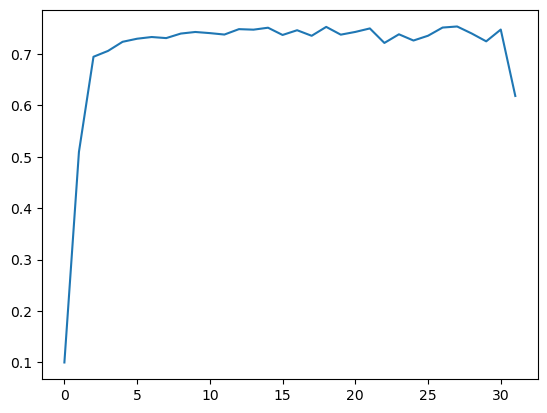

In [17]:
import matplotlib.pyplot as plt
plt.plot(acc3)

In [18]:
acc3= np.array(acc3)

NameError: name 'test' is not defined

In [22]:
np.save("acc_fedavg_cifar10.npy",acc3)

In [23]:
global_model.save("fedavg_cifar10.h5")

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
a=np.load("acc_fedavg_cifar10.npy")

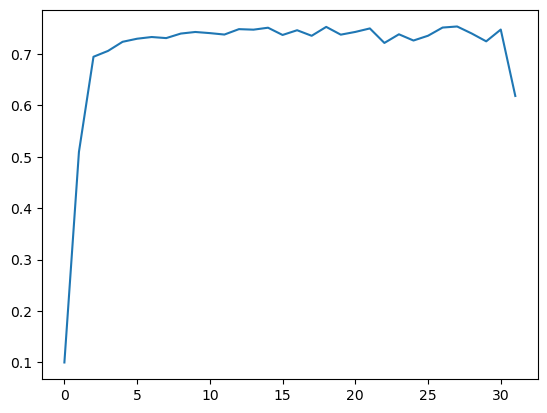

In [25]:
plt.plot(a)